## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  

### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [137]:
#Load the dataset

df = pd.read_csv("C:/Users/win10/Downloads/bank-additional-full.csv", sep=';')

print(df.shape)

df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [138]:
#Features types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Features:", numeric_cols)
print("Categorical Features:", categorical_cols)

Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [139]:
print("--- Numerical Features Statistics ---")
print(df[numeric_cols].describe().T[["min","max","mean","std"]].round(2).to_string())
print("\nSkewness:")
print(df[numeric_cols].skew().round(2).to_string())

--- Numerical Features Statistics ---
                    min      max     mean     std
age               17.00    98.00    40.02   10.42
duration           0.00  4918.00   258.29  259.28
campaign           1.00    56.00     2.57    2.77
pdays              0.00   999.00   962.48  186.91
previous           0.00     7.00     0.17    0.49
emp.var.rate      -3.40     1.40     0.08    1.57
cons.price.idx    92.20    94.77    93.58    0.58
cons.conf.idx    -50.80   -26.90   -40.50    4.63
euribor3m          0.63     5.04     3.62    1.73
nr.employed     4963.60  5228.10  5167.04   72.25

Skewness:
age               0.78
duration          3.26
campaign          4.76
pdays            -4.92
previous          3.83
emp.var.rate     -0.72
cons.price.idx   -0.23
cons.conf.idx     0.30
euribor3m        -0.71
nr.employed      -1.04


In [140]:
# --- Categorical counts ---
print("--- Categorical Feature Value Counts ---")
for col in categorical_cols:
    vc = df[col].value_counts(dropna=False).head(5)
    print(f"\n{col}:")
    print(vc.to_string())
    

--- Categorical Feature Value Counts ---

job:
job
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924

marital:
marital
married     24928
single      11568
divorced     4612
unknown        80

education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176

default:
default
no         32588
unknown     8597
yes            3

housing:
housing
yes        21576
no         18622
unknown      990

loan:
loan
no         33950
yes         6248
unknown      990

contact:
contact
cellular     26144
telephone    15044

month:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101

day_of_week:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827

poutcome:
poutcome
nonexistent    35563
failure         4252
success         1373

y:
y
no     36548
yes     4640


In [141]:
#Missing values
print("--- Missing / Unknown Values ---")
missing = df.isnull().sum()
unknown = df.apply(lambda col: (col == "unknown").sum() if col.dtype == "object" else 0)
summary = pd.DataFrame({"null_count": missing, "unknown_count": unknown})
summary = summary[summary.sum(axis=1) > 0]

print(summary)

#How to handle: make a new category “unknown” and place in it all the unknowns to avoid losing data

--- Missing / Unknown Values ---
           null_count  unknown_count
job                 0            330
marital             0             80
education           0           1731
default             0           8597
housing             0            990
loan                0            990


In [142]:
#correlation between numerical values

corr_matrix = df[numeric_cols].corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [143]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Remove pdays
numeric_cols = numeric_cols.drop('pdays')

#outliers
outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

outlier_counts

{'age': 469,
 'duration': 2963,
 'campaign': 2406,
 'previous': 5625,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 447,
 'euribor3m': 0,
 'nr.employed': 0}

### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [164]:
# Drop irrelevant or target columns
df_cluster = df.drop(['y', 'duration'], axis=1)

df_cluster['was_contacted'] = (df_cluster['pdays'] != 999).astype(int)
df_cluster = df_cluster.drop(columns=['pdays'])


In [165]:
# Encode categorical features into numeric format
df_encoded= pd.get_dummies(df_cluster, drop_first=True)

In [166]:
# Scale numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

In [163]:
# Check for missing values and ensure all features are numeric
print("Missing values:", pd.DataFrame(scaled_data).isnull().sum().sum())
print("All features numeric:", pd.DataFrame(scaled_data).dtypes.unique())
print("Data shape after preparation:", scaled_data.shape)

Missing values: 0
All features numeric: [dtype('float64')]
Data shape after preparation: (41188, 52)


### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [148]:
# Fit K-Means model
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Compute centroids
centroids = kmeans.cluster_centers_

# Assign cluster labels to the dataframe
df_cluster['Cluster'] = labels

# Show cluster counts
print(df_cluster['Cluster'].value_counts())

Cluster
2    24120
1    15548
0     1520
Name: count, dtype: int64


### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

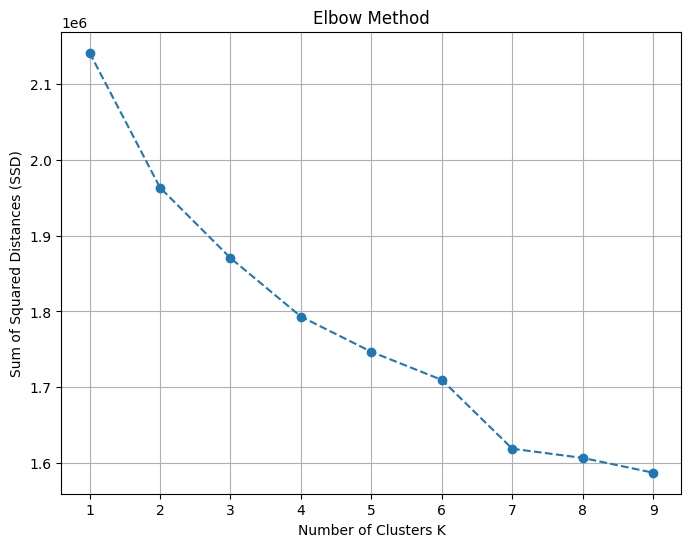

In [168]:
ssd = []
K_range = range(1,10)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(scaled_data)
    ssd.append(km.inertia_)  # Sum of Squared Distances

# Plot SSD vs K
plt.figure(figsize=(8,6))
plt.plot(K_range, ssd, 'o--')
plt.xlabel("Number of Clusters K")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

#starting k=5 the decrease in SSD becomes less 

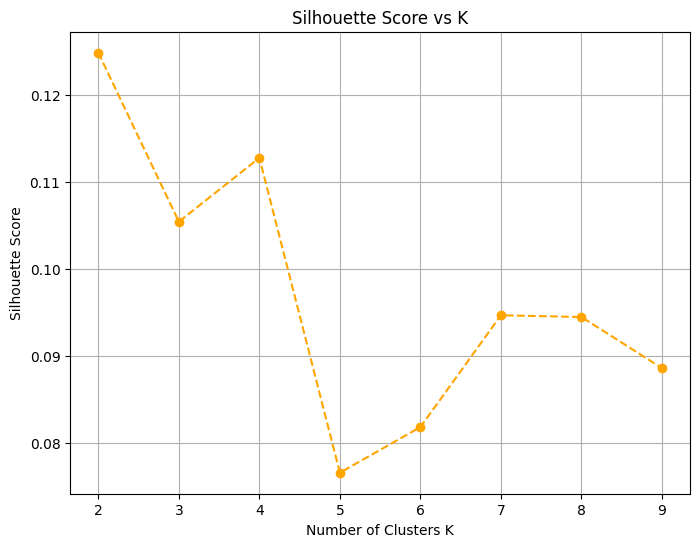

In [150]:
sil_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    # fit K-Means and assign each point to a cluster
    labels = km.fit_predict(scaled_data)

    # average Silhouette Score for all points
    score = silhouette_score(scaled_data, labels)

    sil_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,6))
plt.plot(range(2,10), sil_scores, 'o--', color='orange')
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()